In [1]:
from sklearn import datasets
import numpy as np
import matplotlib as plt
from pylab import *
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA
import pylab as pl
from itertools import cycle

In [2]:
iris = datasets.load_iris()

In [3]:
X1_name = 'sepal length (cm)'
X2_name = 'sepal width (cm)'
X3_name = 'petal length (cm)'
X4_name = 'petal width (cm)'

In [4]:
X = iris.data
y = iris.target

pca=PCA(n_components=2, whiten=True).fit(X)
X_pca = pca.transform(X)

In [5]:
labels=iris.target_names
labels

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=0)

In [11]:
train = xgb.DMatrix(X_train, label=y_train)
test = xgb.DMatrix(X_test, label=y_test)

param = {'max_depth': 5, 
         'eta': 0.01, 
         'objective': 'multi:softmax',
         'num_class': 3}
epochs = 15

bst = xgb.train(param, train, epochs)

[09:46:25] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[09:46:32] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[09:46:37] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[09:46:41] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[09:46:47] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[09:46:53] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=3
[09:46:56] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 2 extra nodes, 0 pruned nodes, max_depth=1
[09:47:03] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 16 extra nodes, 0 pruned nodes, max_depth=4
[09:47:08] src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 8 extra nodes, 0 pruned nodes, max_depth=

In [12]:
predictions = bst.predict(test)
print(predictions)

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0.
 2. 0. 0. 1. 1. 0.]


In [13]:
accuracy_score(y_test, predictions)

0.9666666666666667

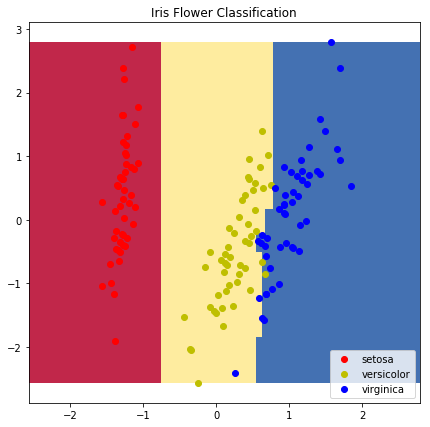

In [14]:
def plot_predictions(model):
    
    x_axis = X_pca[:,0]
    y_axis = X_pca[:,1]
    xx, yy = meshgrid(np.arange(min(min(x_axis),min(y_axis)), max(max(x_axis),max(y_axis)), 0.001),
                      np.arange(min(min(x_axis),min(y_axis)), max(max(x_axis),max(y_axis)), 0.001))
    
    npx=xx.ravel()
    npy=yy.ravel()
    
    sample_points = np.c_[npx, npy]
    
    sample_points_matrix = xgb.DMatrix(sample_points)
    Z = model.predict(sample_points_matrix)
    
    plt.figure(figsize=(7,7))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='Spectral', aplha=0.8)
    
    
    colors = cycle('ryb')
    
    for i, c, label in zip(range(len(labels)), colors, labels):
        plt.scatter(x_axis[iris.target==i], y_axis[iris.target==i], c=c, label=label)
    
    plt.title('Iris Flower Classification')
    #plt.xlabel(X1_name)
    #plt.ylabel(X2_name)
    
    #red_patch = mpatches.Patch(color='red', label='Setosa')
    #yellow_patch = mpatches.Patch(color='yellow', label='Versicolor')
    #blue_patch = mpatches.Patch(color='blue', label='Virginica')
    #plt.legend(handles=[blue_patch, yellow_patch, red_patch])
    plt.legend(loc=4)
    plt.show()
    
plot_predictions(bst)